In [1]:
# load modules
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from venn import venn
from matplotlib.colors import ListedColormap

/home/lubo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Summary tables

In [34]:
# Variables
project = 'Suthaus_2022'
raw_data = os.path.join('..', 'raw_data')
data_path = os.path.join(raw_data, 
                         'phyl_placement', 
                         project, 
                         'vampyrellida', 
                         'downstream_analyses', 
                         'tax_assignment', 
                         'tax_assign_summary_table.tsv')

In [35]:
sum_table = pd.read_csv(data_path, sep="\t")

In [36]:
sum_table

,otu_id,sample_id,lwr,taxopath
0,centroid=seq138_11;seqs=2,NH1,0.547100,Vampyrellida;Leptophryidae;Leptophryidae_X;Lep...
1,centroid=seq130_14;seqs=1,NH4,0.986600,Vampyrellida;Leptophryidae
2,centroid=seq171_7;seqs=1,NH4,0.879900,Vampyrellida;Vampyrellidae;Vampyrella;Vampyrel...
3,centroid=seq303_32;seqs=2,Sim17,0.507400,Vampyrellida;Leptophryidae;Arachnomyxa;Arachno...
4,centroid=seq71_62;seqs=1,Sim17,0.934900,Vampyrellida;Vampyrellida_clade_PurpleVamp;cla...
5,centroid=seq112_23;seqs=1,Sim22,0.000012,Vampyrellida;Placopodidae;Placopus;Placopus_X
6,centroid=seq122_25;seqs=4,Sim22,0.035950,Vampyrellida;Leptophryidae;Arachnomyxa;Arachno...
7,centroid=seq206_22;seqs=1,Sim22,0.993100,Vampyrellida;Sericomyxidae;Sericomyxidae_X
8,centroid=seq384_28;seqs=1,Sim22,0.620100,Vampyrellida;Vampyrellidae;Vampyrella
9,centroid=seq16_109;seqs=1,Th16,0.384800,Vampyrellida


In [37]:
# Adjust summary table

# get rid off allsamples otus
# sum_table = sum_table[sum_table["sample_id"] != "allsamples"]

# get sample as a categorical variable into indicator (1/0) variable
# sum_table = pd.get_dummies(sum_table, columns = ["sample_id"], prefix = "", prefix_sep = "")

# split the taxopath column into individual columns (each for one taxon level)
taxpath_labels=["Order", "Family", "Genus", "Species"]
sum_table[taxpath_labels]=sum_table["taxopath"].str.split(pat=";", expand=True)
sum_table=sum_table.drop(columns=["taxopath"])

sum_table.sort_values(by="otu_id", inplace=True)

In [38]:
sum_table.head(3)

,otu_id,sample_id,lwr,Order,Family,Genus,Species
5,centroid=seq112_23;seqs=1,Sim22,0.000012,Vampyrellida,Placopodidae,Placopus,Placopus_X
6,centroid=seq122_25;seqs=4,Sim22,0.035950,Vampyrellida,Leptophryidae,Arachnomyxa,Arachnomyxa_cryptophaga
1,centroid=seq130_14;seqs=1,NH4,0.986600,Vampyrellida,Leptophryidae,None,None


In [42]:
# save as tsv
output_path = os.path.join(raw_data, 
                        'phyl_placement', 
                        project, 
                        'vampyrellida', 
                        'downstream_analyses', 
                        'results', 
                        'summary_table.tsv')

sum_table.to_csv(output_path, sep="\t", index=False)

## Comparing taxonomic assignment and phylogenetic placement methods

### Load data

In [43]:
# Variables
project = 'Suthaus_2022'
cell = 'cellCombined'
marker = 'Full18S'
sim = 'sim90'
denoise_method = 'RAD'
raw_data = os.path.join('..', 'raw_data')
tax_assign_results = os.path.join(raw_data, 'tax_assign_results', project, marker, cell, sim, denoise_method)
otu_results = os.path.join(raw_data, 'OTU_results', project)

In [44]:
# taxonomic assignment table
data_path = os.path.join(otu_results, 'final_tax_table_Full18S_sim90.csv')
tax_assign = pd.read_csv(data_path)
tax_assign = tax_assign[tax_assign["Order"] == "Vampyrellida"] # keep only vampyrellids

In [45]:
tax_assign.head(3)

,OTU,OTU_Num,Reference_ID,Kingdom,Domain,Phyllum,Class,Order,Family,Genus,Species,Pident,Length,Sample
3,seq213_14,1,KC511080,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Leptophryidae,Leptophryidae_X,Leptophryidae_XX,92.2,641,Th38
18,seq272_12,1,KC511080,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Leptophryidae,Leptophryidae_X,Leptophryidae_XX,92.8,643,Th38
53,seq37_84,2,GQ377666,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Leptophryidae,Theratromyxa,Theratromyxa_weberi,96.0,1766,Th38


In [46]:
# phylogenetic placement

data_path = os.path.join(raw_data, 
                        'phyl_placement', 
                        project, 
                        'vampyrellida', 
                        'downstream_analyses', 
                        'results', 
                        'summary_table.tsv')

phyl_placement = pd.read_csv(data_path, sep="\t")

In [54]:
phyl_placement.head(3)

,OTU,Sample,lwr,Order,Family,Genus,Species
0,seq112_23,Sim22,0.000012,Vampyrellida,Placopodidae,Placopus,Placopus_X
1,seq122_25,Sim22,0.035950,Vampyrellida,Leptophryidae,Arachnomyxa,Arachnomyxa_cryptophaga
2,seq130_14,NH4,0.986600,Vampyrellida,Leptophryidae,NaN,NaN


In [49]:
# adjusting the otu_id names, so they will match in both tables
f = lambda x: ';'.join(x.split(';')[:-1]).strip('centroid=')
phyl_placement['otu_id'] = phyl_placement['otu_id'].apply(f)
# rename the columns, so they will match in both tables
phyl_placement = phyl_placement.rename(columns={'otu_id': 'OTU', 'sample_id': 'Sample'})

In [19]:
# prepare data for plotting
tax_levels=["order", "family", "genus", "species"]
data={"taxonomy": [],
     "count": [],
     "method": []}

for tax_level in tax_levels:
    # loop for the taxonomic assignment part
    data["taxonomy"].append(tax_level)
    data["count"].append(tax_assign[tax_level].count())
    data["method"].append("taxonomic assignment")
    # loop for the phylogenetic placement part
    data["taxonomy"].append(tax_level)
    data["count"].append(phyl_placement[tax_level].count())
    data["method"].append("phylogenetic placement")

KeyError: 'Order'

In [ ]:
# plotting
project="Jamy_2022"
raw_data="../raw_data"
data_path=f"{raw_data}/phyl_placement/{project}/vampyrellida/downstream_analyses/results"


sns.set_style("white")
sns.barplot(data=data, x="taxonomy", y="count", hue="method", palette=["#D81B60", "#1E88E5"])

sns.despine();

# save
plt.savefig(f"{data_path}/assignment_method_comparison.png", dpi=300, transparent=False, facecolor='white')

### Venn diagrams

In [20]:
# prepare input data for the venn diagrams

venn_data = {
    "Taxonomic Assignment": set(tax_assign["otu_id"].tolist()),
    "Phylogenetic Placement": set(phyl_placement["otu_id"].tolist())
}

KeyError: 'otu_id'

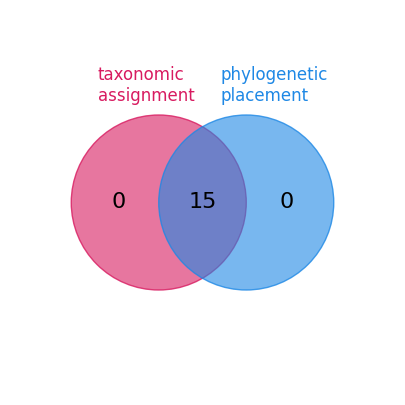

In [26]:
# plotting
# venn diagram using the pyvenn library: https://pypi.org/project/venn/

project="Jamy_2019"
raw_data="../raw_data"
data_path=f"{raw_data}/phyl_placement/{project}/vampyrellida/downstream_analyses/results"

fig, ax1 = plt.subplots(figsize=(10,5), nrows=1, ncols=1)

c = venn(venn_data, 
         alpha=0.6, 
         figsize=(10, 5), 
         fontsize=16, 
         cmap=ListedColormap(["#D81B60", "#1E88E5"]), 
         ax=ax1)

ax1.get_legend().remove()
plt.text(0.20, # horizontal
         0.79, # vertical
         'taxonomic\nassignment', 
         fontsize=12, color='#D81B60')

plt.text(0.55, # horizontal
         0.79, # vertical
         'phylogenetic\nplacement', 
         fontsize=12, color='#1E88E5')

# save
plt.savefig(f"{data_path}/venn_assignment_method_comparison.png", dpi=300, transparent=False, facecolor='white')